In [3]:
import math
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
class test_function():
    
    def __init__(self, name, value, dim, nb_params, convex=None, grad=None, hess=None, HCN=None):
        self.name = name
        self.value = value
        self.dim = dim
        self.nb_params = nb_params
        self.convex = convex
        self.grad = grad
        self.hess = hess
        self.HCN = HCN

In [5]:
quad_I_d = {
    "name": "quadratic_1",
    "dim" : 1,
    "nb_params" : 1,
    "convex" : True,
    "value" : (lambda x, gamma: gamma*(x**2) + x + 1),
    "grad"  : (lambda x, gamma: 2*gamma*x + 1),
    "hess"  : (lambda x, gamma: 2*gamma),
    "HCN"   : 1
}

quad_I = test_function(**quad_I_d)

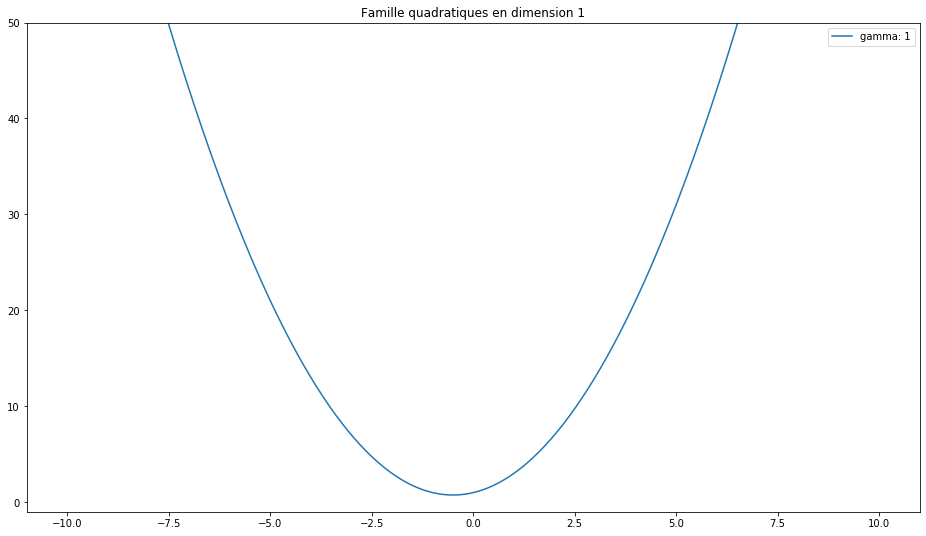

In [7]:
gamma = 1

fig, ax = plt.subplots(figsize=(16, 9))
x = np.linspace(-10, 10, 400)
ax.set_ylim(-1, 50)
ax.plot(x, quad_I.value(x, 1), label="gamma: {}".format(gamma))
ax.set_title("Famille quadratiques en dimension 1")
ax.legend()

In [10]:
from math import pow

def descent(f, grad, x, delta_x_n, alpha=0.1, beta=0.8):
    t = 1
    while f(x + t * delta_x_n) > f(x) + alpha * t * np.transpose(grad(x)) * delta_x_n:
        t = beta * t
    return t

def newton(x_0, f, grad, epsilon):
    gamma = 1
    print(f)
    print(grad)
    x = x_0
    delta_x_n = -1 * pow((grad(x))**2, -1) * grad(x)
    lambda_x = -1 * np.transpose(grad(x)) *  delta_x_n
    while lambda_x / 2 > epsilon:
        delta_x_n = -1 * pow((grad(x))**2, -1) * grad(x)
        lambda_x = -1 * np.transpose(grad(x)) *  delta_x_n
        t = descent(f, grad, x, delta_x_n, gamma)
        x = x + t * delta_x_n
    return x

In [12]:
newton(0.5, (lambda x : quad_I.value (x, 2)), (lambda x, : quad_I.grad (x, 2)), 0.1)

<function <lambda> at 0x7f57f2db3710>
<function <lambda> at 0x7f57f2db3d40>


KeyboardInterrupt: 